In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import matplotlib.lines as mlines
from scipy.optimize import curve_fit
from scipy.stats import sem
import h5py
from pathlib import Path
from collections.abc import Iterable
from matplotlib.colors import LogNorm
import os

In [155]:
datapath = Path.cwd() / "data/disorder_with_otocs/"
figurepath = Path.cwd() / "figures"

In [156]:
W = 5.88    # Figure width in inches, approximately A4-width - 2*1.25in margin
plt.rcParams.update({
    'figure.figsize': (W, W),#/(4/3)),     # 1:1 aspect ratio
    'font.size' : 11,                   # Set font size to 11pt
    'axes.labelsize': 11,               # -> axis labels
    'legend.fontsize': 10,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        # ... more packages if needed
    )
})

In [157]:
def set_size(width='thesis', fraction=1, subplots=(1, 1),aspect_ratio=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    #aspect_ratio = 1#(5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * aspect_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


In [158]:
def rearrange_data(arr): #
    res = np.swapaxes(arr,-1,-2)
    #res = np.swapaxes(arr,-2,0)
    return res[:,:,0]

In [159]:
foldersWCS = [datapath/"WAHUHA_FR/h = 3",datapath/"WAHUHA_FR/h = 6",datapath/"WAHUHA_FR/h = 9",datapath/"WAHUHA_FR/h = 12"]
foldersRCS = [datapath/"Rhim_FR/h = 3",datapath/"Rhim_FR/h = 6",datapath/"Rhim_FR/h = 9",datapath/"Rhim_FR/h = 12"]

In [160]:
T = np.arange(0.1,20.1,0.1)
hs = [3,6,9,12]
Nstates = 50
n = 100

In [161]:
fidWCS = []
otoFlWCS = []
ototrueWCS = []

for i in range(4):
    fidWCS.append([])
    otoFlWCS.append([])
    ototrueWCS.append([])
    for file in os.listdir(foldersWCS[i]):
        if ".jld2" in file:
            with h5py.File(foldersWCS[i]/file) as f:
                fidWCS[i].append(np.swapaxes(f["fidelities"][()],0,-1))
                otoFlWCS[i].append(np.asarray(f["otocs"][()]))
                ototrueWCS[i].append(np.asarray(f["true_otocs"][()]))
    fidWCS[i] = np.concatenate(fidWCS[i],axis=1)
    otoFlWCS[i] = np.concatenate(otoFlWCS[i],axis=1)
    ototrueWCS[i] = np.concatenate(ototrueWCS[i],axis=1)
    otoFlWCS[i] = np.swapaxes(np.swapaxes(otoFlWCS[i],0,-1),1,2)
    ototrueWCS[i] = 2*np.ones((200,11,ototrueWCS[i].shape[1],50))-2*np.swapaxes(np.swapaxes(ototrueWCS[i],0,-1),1,2)


fidRCS = []
otoFlRCS = []
ototrueRCS = []

for i in range(4):
    fidRCS.append([])
    otoFlRCS.append([])
    ototrueRCS.append([])
    for file in os.listdir(foldersRCS[i]):
        if ".jld2" in file:
            with h5py.File(foldersRCS[i]/file) as f:
                fidRCS[i].append(np.swapaxes(f["fidelities"][()],0,-1))
                otoFlRCS[i].append(np.asarray(f["otocs"][()]))
                ototrueRCS[i].append(np.asarray(f["true_otocs"][()]))
    fidRCS[i] = np.concatenate(fidRCS[i],axis=1)
    otoFlRCS[i] = np.concatenate(otoFlRCS[i],axis=1)
    ototrueRCS[i] = np.concatenate(ototrueRCS[i],axis=1)
    otoFlRCS[i] = np.swapaxes(np.swapaxes(otoFlRCS[i],0,-1),1,2)
    ototrueRCS[i] = 2*np.ones((200,11,ototrueRCS[i].shape[1],50))-2*np.swapaxes(np.swapaxes(ototrueRCS[i],0,-1),1,2)


In [162]:
fidWCS[-1].shape

(200, 100, 50)

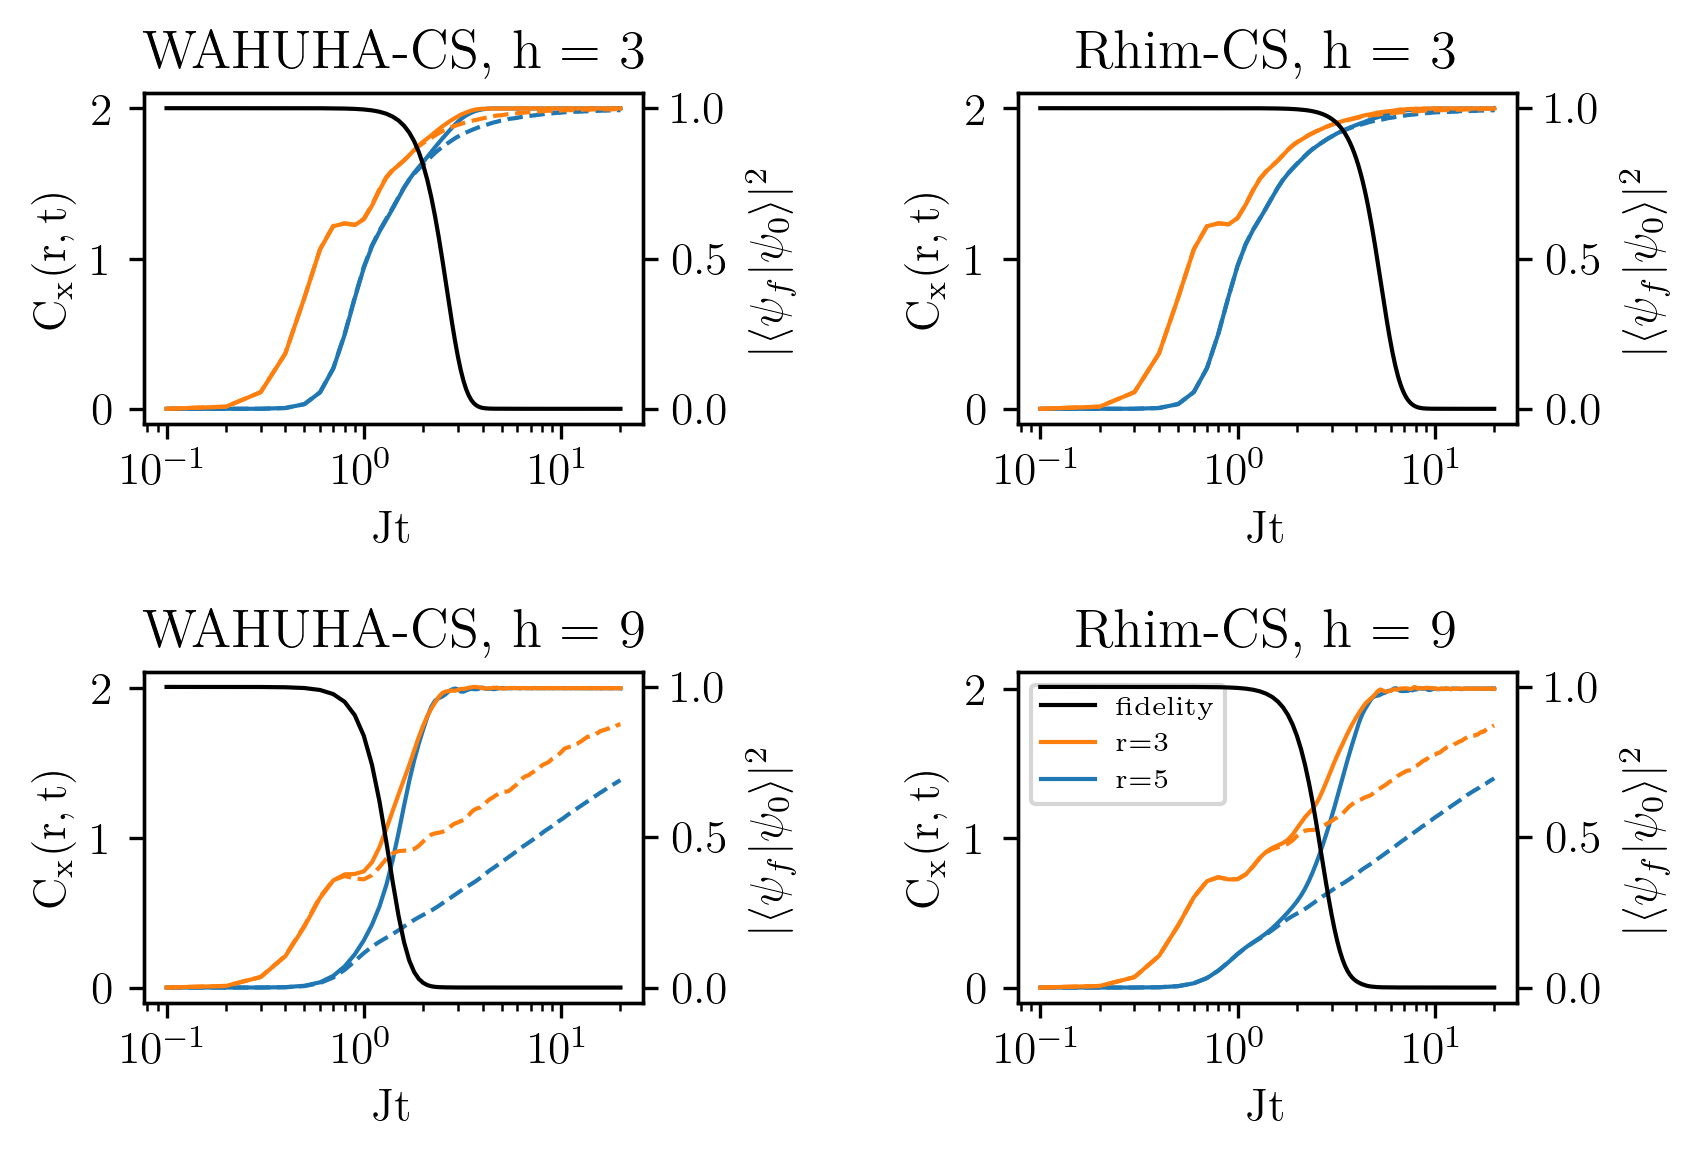

In [190]:
fig,axs = plt.subplots(2,2,figsize=set_size(subplots=(2,3)),sharey=False,dpi = 300)
nset = 0
j = 0

axr00 = axs[0,0].twinx()
axr00.semilogx(T,np.mean(fidWCS[nset],axis=(-2,-1)),lw=1,c="black")
axs[0,0].semilogx(T,np.mean(ototrueWCS[nset],axis=(-2,-1))[:,j],lw=1,ls="--",c="C0")
axs[0,0].semilogx(T,np.mean(otoFlWCS[nset],axis=(-2,-1))[:,j],lw=1,c="C0")
axs[0,0].semilogx(T,np.mean(ototrueWCS[nset],axis=(-2,-1))[:,j+2],lw=1,ls="--",c="C1")
axs[0,0].semilogx(T,np.mean(otoFlWCS[nset],axis=(-2,-1))[:,j+2],lw=1,c="C1")
axs[0,0].set_title("WAHUHA-CS, h = 3")
axs[0,0].set_xlabel("Jt")
axs[0,0].set_ylabel(r"$\mathrm{C_x(r,t)}$")
axr00.set_ylabel(r"$|\langle\psi_f|\psi_0\rangle|^2$")


axr01 = axs[0,1].twinx()
axr01.semilogx(T,np.mean(fidRCS[nset],axis=(-2,-1)),lw=1,c="black")
axs[0,1].semilogx(T,np.mean(ototrueRCS[nset],axis=(-2,-1))[:,j],lw=1,ls="--",c="C0")
axs[0,1].semilogx(T,np.mean(otoFlRCS[nset],axis=(-2,-1))[:,j],lw=1,c="C0")
axs[0,1].semilogx(T,np.mean(ototrueRCS[nset],axis=(-2,-1))[:,j+2],lw=1,ls="--",c="C1")
axs[0,1].semilogx(T,np.mean(otoFlRCS[nset],axis=(-2,-1))[:,j+2],lw=1,c="C1")
axs[0,1].set_title("Rhim-CS, h = 3")
axs[0,1].set_xlabel("Jt")
axs[0,1].set_ylabel(r"$\mathrm{C_x(r,t)}$")
axr01.set_ylabel(r"$|\langle\psi_f|\psi_0\rangle|^2$")


nset = 2

axr10 = axs[1,0].twinx()
axr10.semilogx(T,np.mean(fidWCS[nset],axis=(-2,-1)),lw=1,c="black")
axs[1,0].semilogx(T,np.mean(ototrueWCS[nset],axis=(-2,-1))[:,j],lw=1,ls="--",c="C0")
axs[1,0].semilogx(T,np.mean(otoFlWCS[nset],axis=(-2,-1))[:,j],lw=1,c="C0")
axs[1,0].semilogx(T,np.mean(ototrueWCS[nset],axis=(-2,-1))[:,j+2],lw=1,ls="--",c="C1")
axs[1,0].semilogx(T,np.mean(otoFlWCS[nset],axis=(-2,-1))[:,j+2],lw=1,c="C1")
axs[1,0].set_title("WAHUHA-CS, h = 9")
axs[1,0].set_xlabel("Jt")
axs[1,0].set_ylabel(r"$\mathrm{C_x(r,t)}$")
axr10.set_ylabel(r"$|\langle\psi_f|\psi_0\rangle|^2$")


axr11 = axs[1,1].twinx()
axr11.semilogx(T,np.mean(fidRCS[nset],axis=(-2,-1)),lw=1,c="black")
axs[1,1].semilogx(T,np.mean(ototrueRCS[nset],axis=(-2,-1))[:,j],lw=1,ls="--",c="C0")
axs[1,1].semilogx(T,np.mean(otoFlRCS[nset],axis=(-2,-1))[:,j],lw=1,c="C0")
axs[1,1].semilogx(T,np.mean(ototrueRCS[nset],axis=(-2,-1))[:,j+2],lw=1,ls="--",c="C1")
axs[1,1].semilogx(T,np.mean(otoFlRCS[nset],axis=(-2,-1))[:,j+2],lw=1,c="C1")
axs[1,1].set_title("Rhim-CS, h = 9")
axs[1,1].set_xlabel("Jt")
axs[1,1].set_ylabel(r"$\mathrm{C_x(r,t)}$")
axr11.set_ylabel(r"$|\langle\psi_f|\psi_0\rangle|^2$")



black_line = mlines.Line2D([], [], color='black', label=r"fidelity",lw=1)
blue_line = mlines.Line2D([], [], color='C0', label=r"r=5",lw=1)
orange_line = mlines.Line2D([], [], color='C1', label=r"r=3",lw=1)

axs[1,1].legend(handles = [black_line,orange_line,blue_line],fontsize="xx-small",loc="upper left")

plt.subplots_adjust(wspace=0.75,hspace=0.75)
plt.savefig(figurepath/"disorder.png",format="png",bbox_inches='tight',dpi=600)
plt.show()